In [12]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


In [13]:
## Loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()


In [14]:
## Displaying Input Variables
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:

## Displaying the Output Variable
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:

## Creating a Dataframe out of the dataset loaded
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:

df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:

df[df.target==1].head()
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [19]:

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:

df[45:55]
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]


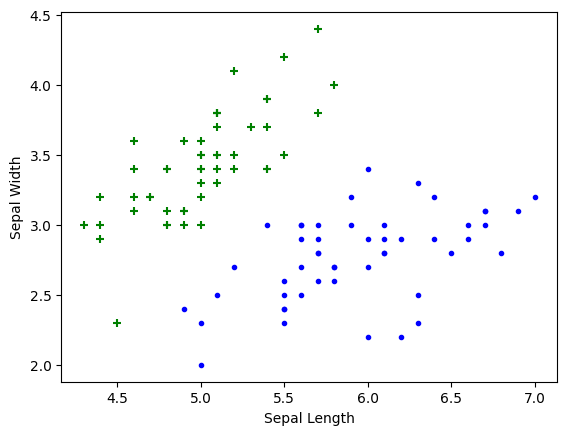

In [21]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


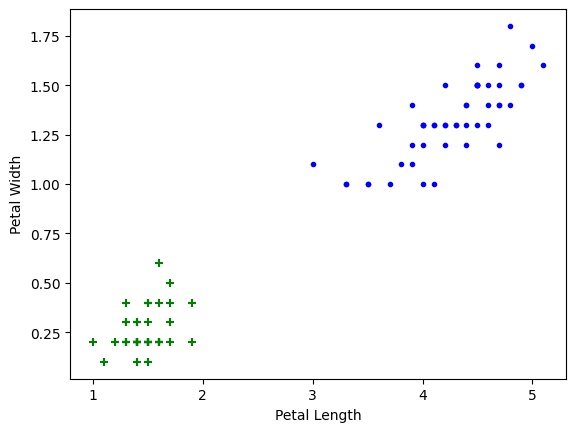

In [22]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')


In [24]:
## Separating Input/Output Varaiables and Creating Training-Testing Sets
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.svm import SVC
model = SVC()


In [25]:
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9666666666666667

In [26]:
model.predict([[4.8,3.0,1.5,0.3]])


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [27]:
## 1. Regularization (C)
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


0.9666666666666667

In [28]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


0.9333333333333333

In [29]:
## 2. Gamma
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)


0.9

In [30]:
## 3. Kernel
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)


0.9666666666666667

In [31]:
y_pred = model_linear_kernal.predict(X_test)


In [32]:
## Model Performance - Confusion Matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix: 
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


In [ ]:
## Model Performance - Classification Report


In [33]:
from sklearn import metrics
# accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred))
# precision score
print("precision:", metrics.precision_score(y_test,y_pred, average='macro'))
# recall score
print("recall" , metrics.recall_score(y_test,y_pred, average='macro'))
print(metrics.classification_report(y_test, y_pred))


acuracy: 0.9666666666666667
precision: 0.9666666666666667
recall 0.9696969696969697
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
## Visulaizing the Results


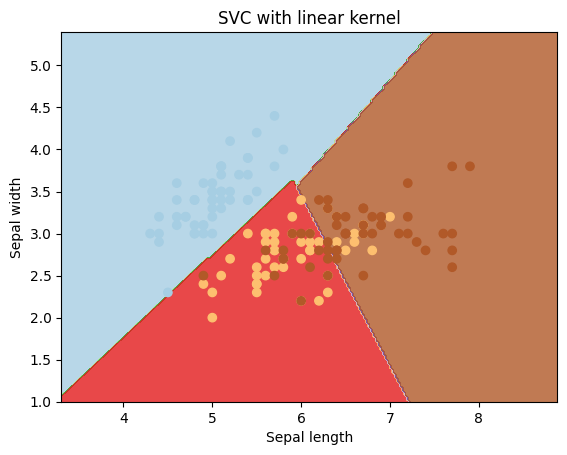

In [34]:
from matplotlib.colors import ListedColormap
X = iris.data[:, :2]
y = iris.target
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='linear', C=1).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()


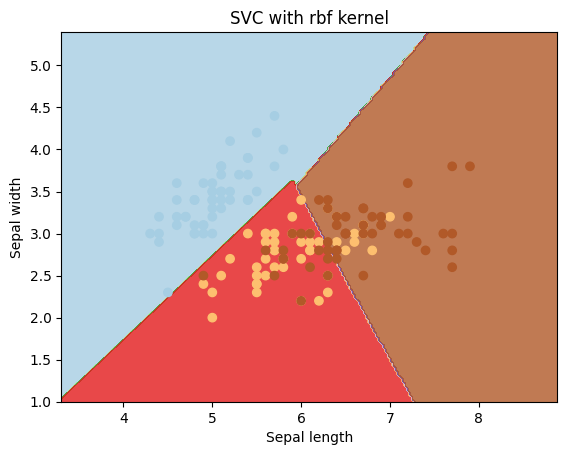

In [35]:
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='rbf', C=100, gamma=0.01).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()


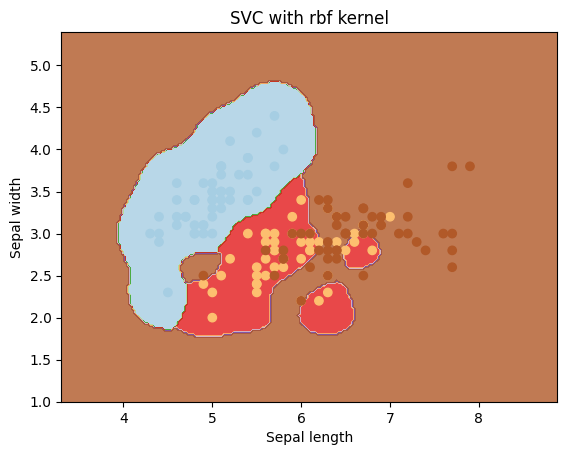

In [36]:
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='rbf', C=10, gamma=10).fit(X, y)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with rbf kernel')
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':(1, 10, 100, 1000), 'gamma':(0.1, 0.01, 0.001, 0.0001)}
grid_search = GridSearchCV(svc, param_grid, cv=10, verbose=10)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START C=1, gamma=0.1............................................
[CV 1/10; 1/16] END .............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/10; 1/16] START C=1, gamma=0.1............................................
[CV 2/10; 1/16] END .............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 3/10; 1/16] START C=1, gamma=0.1............................................
[CV 3/10; 1/16] END .............C=1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 4/10; 1/16] START C=1, gamma=0.1............................................
[CV 4/10; 1/16] END .............C=1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 5/10; 1/16] START C=1, gamma=0.1............................................
[CV 5/10; 1/16] END .............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 6/10; 1/16] START C=1, gamma=0.1............................................
[CV 6/10; 1/16] END .............C=1, gamma=0.

GridSearchCV(cv=10, estimator=SVC(C=10, gamma=10),
             param_grid={'C': (1, 10, 100, 1000),
                         'gamma': (0.1, 0.01, 0.001, 0.0001)},
             verbose=10)